In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
from sklearn import datasets

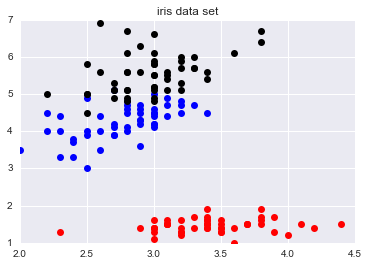

In [3]:
iris = datasets.load_iris()
X = iris.data[:, [1,2]]  # we only take the first two features.
y = iris.target
uniq=np.unique(y)
c=['ro','bo','ko']
for i in range(3):
    index=y==uniq[i]
    plt.plot(X[index,0],X[index,1],c[i])
plt.title('iris data set')
plt.show()

In [4]:
def sig( signal ):
    # Prevent overflow.
    signal = np.clip( signal, -500, 500 )

    # Calculate activation signal
    signal = 1.0/( 1 + np.exp( -signal ))

    return signal
#end
def d_sig(x):
    return (1-np.power(sig(x),2))

In [5]:
def prediction(W1,W2,X):
    Xnew=np.r_[1,X]
    a1=np.dot(Xnew,W1)
    z1=sig(a1)
    z1=np.r_[1,z1]
    a2=np.dot(z1,W2)
    #softmax
    z2=np.exp(a2)
    return z2,np.argmax(z2)

In [42]:
np.random.seed(0)
nn_input=2
nn_hidden1=5
nn_hidden2=10
nn_output=3
w1=0.1*np.random.randn(nn_input+1,nn_hidden1)
w2=0.1*np.random.randn(nn_hidden1+1,nn_hidden2)
w3=0.1*np.random.randn(nn_hidden2+1,nn_output)
Xnew=np.c_[np.ones(len(X)),X]


for i in range(200000):
    a2=np.dot(Xnew,w1)
    z2=sig(a2)
    
    znew=np.c_[np.ones(len(z2)),z2]
    a3=np.dot(znew,w2)
    z3=sig(a3)
    
    znew1=np.c_[np.ones(len(z3)),z3]
    a4=np.dot(znew1,w3)
    exp_val=np.exp(a4)
    z4=exp_val/np.sum(exp_val,axis=1,keepdims=True)
    onlyval=z4[range(len(X)),y]
    energy=-np.sum(np.log(onlyval))
    if energy and i%100000==0:
        print 'iteration %i: %f' %(i,energy)
    
    
    delta4=z4
    delta4[[range(len(X)),y]]=delta4[[range(len(X)),y]]-1
    dw3=np.dot(znew1.T,((delta4)))
    
    delta3=np.dot(delta4,w3.T)
    delta3=delta3[:,1:]*d_sig(a3)
    dw2=np.dot(znew.T,delta3)
    
    
    delta2=np.dot(delta3,w2.T)
    delta2=delta2[:,1:]*d_sig(a2)
    dw1=np.dot(Xnew.T,delta2)
    
    epsilon=0.001
    w3=w3-epsilon*dw3
    w2=w2-epsilon*dw2
    w1=w1-epsilon*dw1
    
   

iteration 0: 167.418059
iteration 100000: 36.787308


In [43]:
def prediction(W1,W2,X):
    Xnew=np.r_[1,X]
    a1=np.dot(Xnew,W1)
    z1=sig(a1)
    z1=np.r_[1,z1]
    a2=np.dot(z1,W2)
    #softmax
    z2=np.exp(a2)
    return z2,np.argmax(z2)

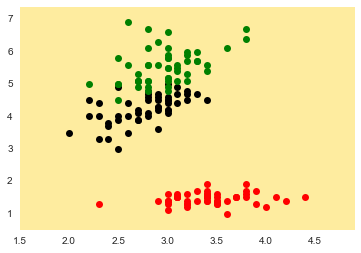

In [44]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = (np.c_[xx.ravel(), yy.ravel()])
m=Z.shape[0]
labels=[]
for i in range(m):
    [x,myvalue]=prediction(w1,w2,Z[i])
    if myvalue==2:
        label=2
    if myvalue==1:
        label=1
    elif myvalue==0:
        label=0
    labels.append(label)
    
labels=np.array(labels)
labels=labels.reshape(xx.shape)
plt.contourf(xx, yy, labels,cmap=plt.cm.Spectral)
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
uniq=np.unique(y)
color=['ro','ko','go']
for i in range(3):
    index=y==uniq[i]
    plt.plot(X[index,0],X[index,1],color[i])
plt.show()

In [45]:
labels.min()

2